In [1]:
import pandas as pd

penguins = pd.read_csv("penguins_classification.csv")

# only keep the Adelie and Chinstrap classes
penguins = (
    penguins.set_index("Species").loc[["Adelie", "Chinstrap"]].reset_index()
)
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"
penguins.head()

,Species,Culmen Length (mm),Culmen Depth (mm)
0,Adelie,39.1,18.7
1,Adelie,39.5,17.4
2,Adelie,40.3,18.0
3,Adelie,36.7,19.3
4,Adelie,39.3,20.6


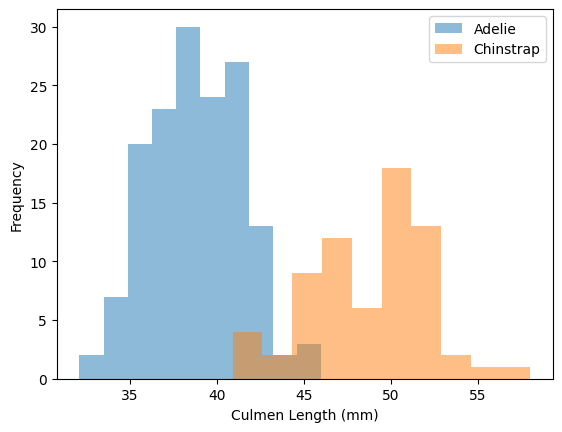

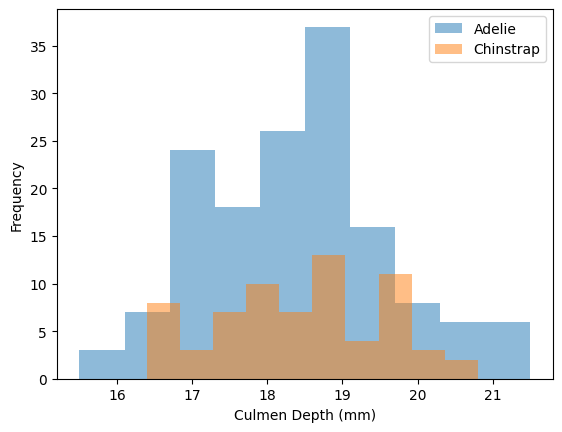

In [2]:
import matplotlib.pyplot as plt

for feature_name in culmen_columns:
    plt.figure()
    penguins.groupby("Species")[feature_name].plot.hist(alpha=0.5, legend=True)
    plt.xlabel(feature_name)

In [3]:
from sklearn.model_selection import train_test_split

penguins_train, penguins_test = train_test_split(penguins, random_state=0)

data_train = penguins_train[culmen_columns]
data_test  = penguins_test[culmen_columns]

target_train = penguins_train[target_column]
target_test = penguins_test[target_column]

In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logistic_regression = make_pipeline(StandardScaler(), LogisticRegression())
logistic_regression.fit(data_train, target_train)
accuracy = logistic_regression.score(data_test, target_test)
print(f"Accuracy on test set: {accuracy:.3f}")

Accuracy on test set: 1.000


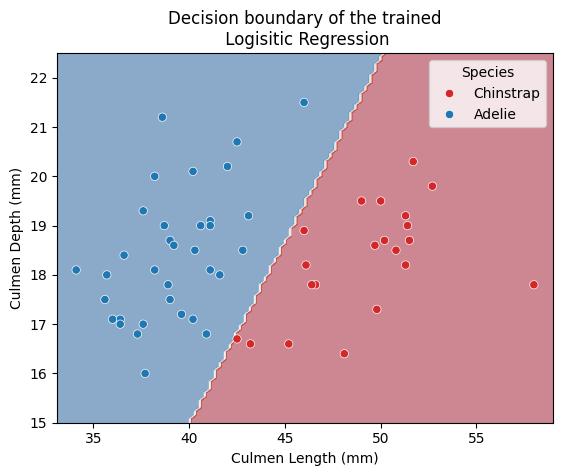

In [5]:
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay

DecisionBoundaryDisplay.from_estimator(
    logistic_regression,
    data_test,
    response_method="predict",
    cmap="RdBu_r",
    alpha=0.5,
)

sns.scatterplot(
    data=penguins_test,
    x=culmen_columns[0],
    y=culmen_columns[1],
    hue=target_column,
    palette=["tab:red", "tab:blue"]
)

_= plt.title("Decision boundary of the trained\n Logisitic Regression")

In [6]:
coefs = logistic_regression[-1].coef_[0]
weights = pd.Series(coefs, index=[f"Weight for '{c}'" for c in culmen_columns])
weights

Weight for 'Culmen Length (mm)'    3.724791
Weight for 'Culmen Depth (mm)'    -1.096371
dtype: float64

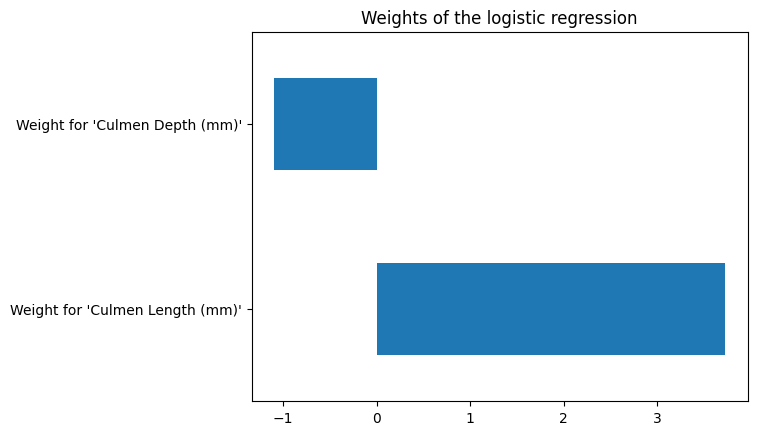

In [8]:
weights.plot.barh()
_ = plt.title("Weights of the logistic regression")

In [9]:
test_penguin = pd.DataFrame(
    {"Culmen Length (mm)": [45], "Culmen Depth (mm)": [17]}
)
logistic_regression.predict(test_penguin)

array(['Chinstrap'], dtype=object)

In [10]:
y_pred_proba = logistic_regression.predict_proba(test_penguin)
y_pred_proba

array([[0.1714923, 0.8285077]])

In [11]:
y_pred_proba.shape

(1, 2)

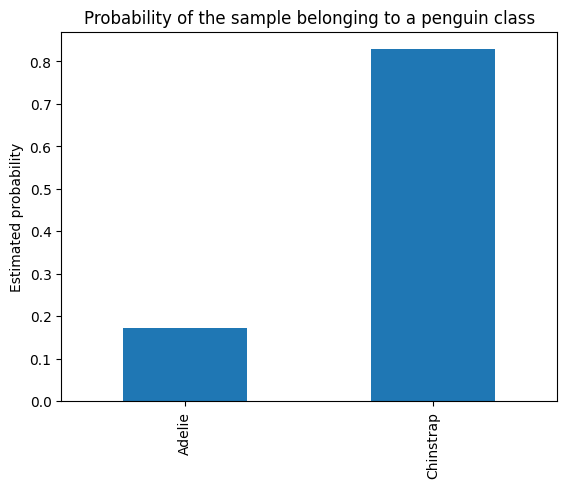

In [12]:
y_proba_sample = pd.Series(
    y_pred_proba.ravel(), index=logistic_regression.classes_
)
y_proba_sample.plot.bar()
plt.ylabel("Estimated probability")
_ = plt.title("Probability of the sample belonging to a penguin class")

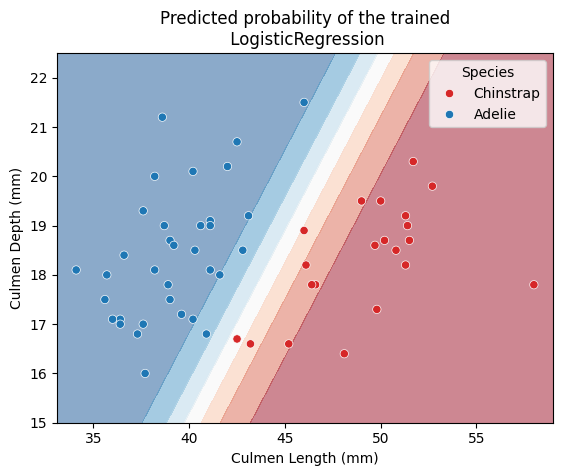

In [13]:
DecisionBoundaryDisplay.from_estimator(
    logistic_regression,
    data_test,
    response_method="predict_proba",
    cmap="RdBu_r",
    alpha=0.5,
)
sns.scatterplot(
    data=penguins_test,
    x=culmen_columns[0],
    y=culmen_columns[1],
    hue=target_column,
    palette=["tab:red", "tab:blue"],
)
_ = plt.title("Predicted probability of the trained\n LogisticRegression")